In [1]:
import matplotlib.pyplot as plt
import numpy as np

(5681, 1, 452) (5681, 1, 452)
0.28164556962025317
0.2310126582278481
0.310126582278481
0.25316455696202533
0.2468354430379747


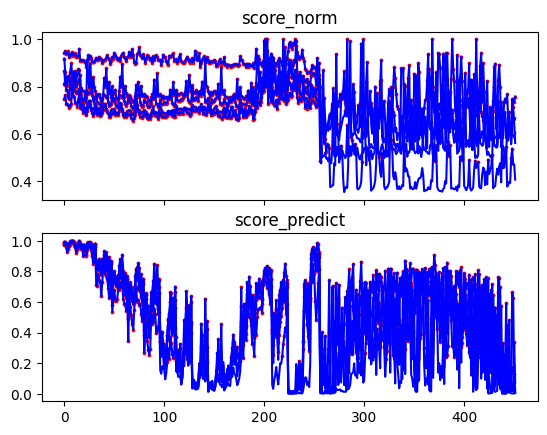

In [16]:
name = 'distribution_0.npy'
norm_distribution = np.load('norm_' + name)
score_distribution = np.load('score_' + name)
print(norm_distribution.shape, score_distribution.shape)
distribution = np.concatenate([norm_distribution, score_distribution], axis=1)
distribution[:, 0, :256] /= distribution[:, 0, :256].max(axis=-1, keepdims=True)
distribution[:, 0, 256:] /= distribution[:, 0, 256:].max(axis=-1, keepdims=True)
distribution[:, 1, :] /= distribution[:, 1, :].max(axis=-1, keepdims=True)
fig, axs = plt.subplots(2, sharex=True)
for index in range(5):
    dist = distribution[index]
    num_token = dist.shape[1]
    indices = np.argsort(dist)[:, -int(num_token * 0.7):]
    print(len(np.setdiff1d(indices[0], indices[1]))/len(indices[0]))
    axs[0].plot(dist[0], c='b')
    axs[1].plot(dist[1], c='b')
    axs[0].scatter(indices[0], dist[0, indices[0]], c='r', s=3)
    axs[1].scatter(indices[1], dist[1, indices[1]], c='r', s=3)
axs[0].set_title('score_norm')
axs[1].set_title('score_predict')
plt.show()